# Système de recommandation des livres 

#### Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Compréhension des données

###### dataset des books

In [2]:
books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
books.head(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10668\3468081960.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  books = pd.read_csv('data/BX-Books.csv', sep=";", error_bad_lines=False, encoding='latin-1')
Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9

Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9

Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9

Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, 

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [3]:
books.shape
# books contient 271360 livres et 8 colonnes

(271360, 8)

In [4]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [5]:
#Ne prend  les 2 colonnes 'Image-URL-S', 'Image-URL-M' dans la table
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [6]:
books.head(1)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...


In [7]:
# Renommer les colonnes de la table 

books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)
books.head(1)

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...


In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   title      271360 non-null  object
 2   author     271359 non-null  object
 3   year       271360 non-null  object
 4   publisher  271358 non-null  object
 5   image_url  271357 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


In [9]:
books.dropna(subset=['image_url'], inplace=True)

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271357 non-null  object
 1   title      271357 non-null  object
 2   author     271356 non-null  object
 3   year       271357 non-null  object
 4   publisher  271355 non-null  object
 5   image_url  271357 non-null  object
dtypes: object(6)
memory usage: 14.5+ MB


In [11]:
print("Number of Book ISBN numbers:", len(books['ISBN'].unique()))
print("Number of book titles:", len(books['title'].unique()))
print('Number of book authors:', len(books['author'].unique()))
print('Number of Publication Years:', len(books['year'].unique()))
print('Number of publisher names:', len(books['publisher'].unique()))
print('Number of images url:', len(books['image_url'].unique()))

Number of Book ISBN numbers: 271357
Number of book titles: 242132
Number of book authors: 102022
Number of Publication Years: 200
Number of publisher names: 16805
Number of images url: 271041


###### dataset des users

In [12]:
users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')
users.head(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10668\450477027.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  users = pd.read_csv('data/BX-Users.csv', sep=";", error_bad_lines=False, encoding='latin-1')


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


In [13]:
users.rename(columns={"User-ID":"user_id"},inplace=True)

In [14]:
users.head(1)

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN


In [15]:
users.shape

(278858, 3)

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [17]:
print('nombre des utilisateurs :', len(users['user_id'].unique()))

nombre des utilisateurs : 278858


###### dataset des ratings

In [18]:
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')
ratings.head(2)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10668\2632206049.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", error_bad_lines=False, encoding='latin-1')


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5


In [19]:
ratings.rename(columns={
    "User-ID":"user_id" , "Book-Rating":"rating"
},inplace=True)

In [20]:
ratings.head(1)

,user_id,ISBN,rating
0,276725,034545104X,0


In [21]:
ratings.shape

(1149780, 3)

In [22]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   user_id  1149780 non-null  int64 
 1   ISBN     1149780 non-null  object
 2   rating   1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [23]:
ratings.shape

(1149780, 3)

In [24]:
print('nombres des utilisateurs dans la table ratings :', len(ratings['user_id'].unique()))
print('nombres des livres dans la table ratings :', len(ratings['ISBN'].unique()))

nombres des utilisateurs dans la table ratings : 105283
nombres des livres dans la table ratings : 340556


In [25]:
print('nombres des livres ratings :')
sorted_ratings = ratings['rating'].value_counts().sort_index()
pd.DataFrame({'rating': sorted_ratings.index, 'total': sorted_ratings.values})

nombres des livres ratings :


,rating,total
0,0,716109
1,1,1770
2,2,2759
3,3,5996
4,4,8904
5,5,50974
6,6,36924
7,7,76457
8,8,103736
9,9,67541


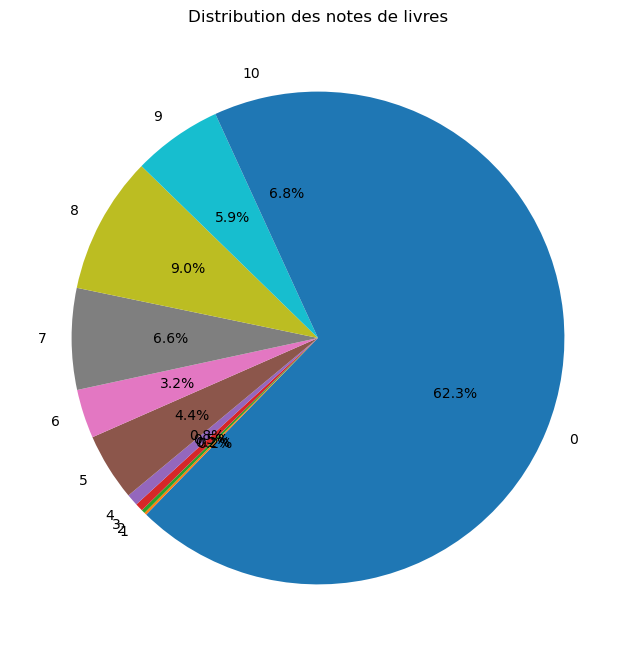

In [26]:
import matplotlib.pyplot as plt
import pandas as pd


# Créez un DataFrame pour les notes triées
df_ratings = pd.DataFrame({'rating': sorted_ratings.index, 'total': sorted_ratings.values})

# Créez un diagramme en cercle avec la distribution des notes
plt.figure(figsize=(8, 8))
plt.pie(df_ratings['total'], labels=df_ratings['rating'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Distribution des notes de livres')
plt.show()


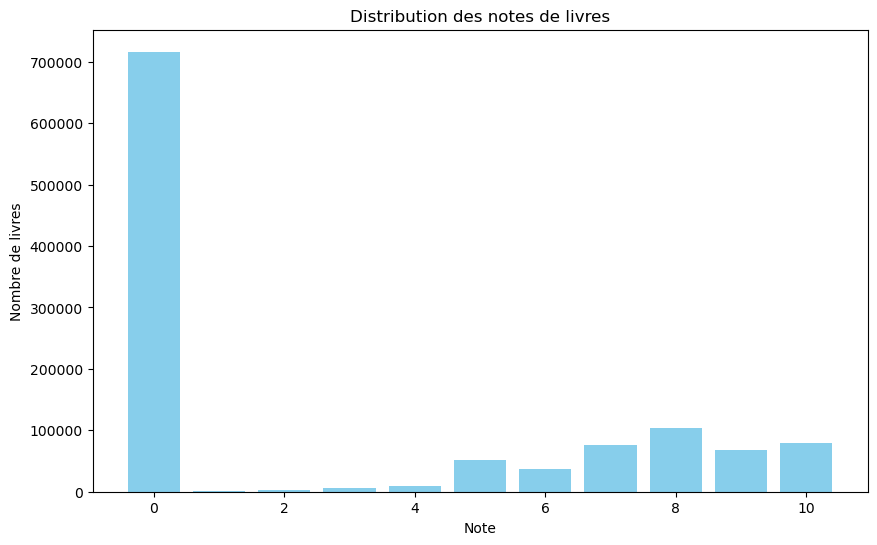

In [27]:
# Créez un DataFrame pour les notes triées
df_ratings = pd.DataFrame({'rating': sorted_ratings.index, 'total': sorted_ratings.values})

# Créez un diagramme à barres avec la distribution des notes
plt.figure(figsize=(10, 6))
plt.bar(df_ratings['rating'], df_ratings['total'], color='skyblue')
plt.xlabel('Note')
plt.ylabel('Nombre de livres')
plt.title('Distribution des notes de livres')
plt.show()


In [28]:
#laisser juste les utilisateur qui ont noter plus de 200 livre
x = ratings['user_id'].value_counts() >200
#récupérer les indices des utilisateurs qui on nter plus de 200 livre
y = x[x].index
#Laisser juste les utilisateur qui ont fait plus de 200 scores
ratings = ratings[ratings['user_id'].isin(y)]

In [29]:
x.head()

11676     True
198711    True
153662    True
98391     True
35859     True
Name: user_id, dtype: bool

In [30]:
#la dimension de x contient tous les utilisateurs qui ont fait plus de 200 score et non 
x.shape

(105283,)

In [31]:
#Maintenant on va voir la dimension de seulement le utilasateur qui ont fait plus de 200 score
x[x].shape

(899,)

In [32]:
#récupérer les indices des utilisateurs qui on nter plus de 200 livre
y = x[x].index

In [33]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727,
            268622, 188951],
           dtype='int64', length=899)

In [34]:
#Laisser juste les utilisateur qui ont fait plus de 200 scores
ratings = ratings[ratings['user_id'].isin(y)]

In [35]:
#ratings de 1149780 à 526356
ratings.shape

(526356, 3)

In [36]:
print('nombres des utilisateurs dans la table ratings :', len(ratings['user_id'].unique()))
print('nombres des livres dans la table ratings :', len(ratings['ISBN'].unique()))

nombres des utilisateurs dans la table ratings : 899
nombres des livres dans la table ratings : 207291


In [37]:
ratings.head(1)

,user_id,ISBN,rating
1456,277427,002542730X,10


In [38]:
books.head(1)

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...


###### join ratings avec books

In [39]:
ratings_with_books = ratings.merge(books, on='ISBN')

In [40]:
ratings_with_books.head(2)

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [41]:
ratings_with_books.shape

(487668, 8)

In [42]:
print('nombres des rate pour chaque livre :')
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()
number_rating.head(3)

nombres des rate pour chaque livre :


,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1


In [43]:
number_rating.rename(columns={"rating":"num_of_rating"} , inplace=True)

In [44]:
print('nombres des rate pour chaque livre :')
number_rating.head(3)

nombres des rate pour chaque livre :


,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1


In [45]:
# Join number_rating avec ratings_with_books
final_rating = ratings_with_books.merge(number_rating, on='title')

In [46]:
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [47]:
final_rating.shape

(487668, 9)

In [48]:
# prends les books qui ont un nombre de rate >= 40
    
final_rating = final_rating[final_rating['num_of_rating'] >= 40]

In [49]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [50]:
final_rating.shape

(77224, 9)

In [51]:
final_rating.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77224 entries, 0 to 279276
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        77224 non-null  int64 
 1   ISBN           77224 non-null  object
 2   rating         77224 non-null  int64 
 3   title          77224 non-null  object
 4   author         77224 non-null  object
 5   year           77224 non-null  object
 6   publisher      77224 non-null  object
 7   image_url      77224 non-null  object
 8   num_of_rating  77224 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 5.9+ MB


In [52]:
print('nombres des utilisateurs dans la table final_rating :', len(final_rating['user_id'].unique()))
print('nombres des livres dans la table final_rating :', len(final_rating['ISBN'].unique()))

nombres des utilisateurs dans la table final_rating : 889
nombres des livres dans la table final_rating : 3155


In [53]:
# Supprimer les doublons
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [54]:
print('nombres des utilisateurs dans la table final_rating :', len(final_rating['user_id'].unique()))
print('nombres des livres dans la table final_rating :', len(final_rating['ISBN'].unique()))

nombres des utilisateurs dans la table final_rating : 889
nombres des livres dans la table final_rating : 3024


In [55]:
final_rating.shape

(74876, 9)

In [56]:

# convert the rating to a float value
final_rating['rating'] = final_rating['rating'].values.astype(np.float32)

# minimum rating value
min_rating = min(final_rating['rating'])

# maximum rating value
max_rating = max(final_rating['rating'])

print(' Min Rating: {}, Max Rating: {}'.format(min_rating, max_rating))

 Min Rating: 0.0, Max Rating: 10.0


In [57]:
final_rating['rating'] = (final_rating['rating'] - min_rating) / (max_rating - min_rating)

In [58]:
final_rating.head(2)

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,1.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


###### Maintenant on va télécharger ce tableau final_rating pour l'utiliser dans Collab est faire de training

In [59]:
import pickle

pickle.dump(final_rating , open('final_rating.pkl' , 'wb' ))



###### Convetire à Pivot table

In [60]:
book_pivot = final_rating.pivot_table(columns="user_id" , index="title" , values="rating")

In [61]:
book_pivot.head(3)

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
book_pivot.shape

(1091, 889)

In [63]:
book_pivot.describe()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
count,64.000000,43.000000,57.000000,23.000000,103.000000,3.000000,57.000000,4.00000,33.000000,179.000000,...,70.000000,96.000000,79.000000,176.000000,30.000000,111.000000,117.000000,23.000000,39.000000,201.000000
mean,0.203125,0.388372,0.294737,0.230435,0.036893,0.533333,0.563158,0.50000,0.606061,0.170950,...,0.272857,0.301042,0.568354,0.094318,0.240000,0.138739,0.179487,0.026087,0.184615,0.024876
std,0.371598,0.455239,0.382390,0.316852,0.185235,0.472582,0.462382,0.57735,0.188645,0.342569,...,0.389322,0.460090,0.429533,0.259828,0.407346,0.321409,0.359487,0.125109,0.324068,0.132582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.350000,0.000000,0.00000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.900000,0.50000,0.600000,0.000000,...,0.000000,0.000000,0.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.900000,0.700000,0.550000,0.000000,0.800000,1.000000,1.00000,0.700000,0.000000,...,0.775000,1.000000,1.000000,0.000000,0.600000,0.000000,0.000000,0.000000,0.250000,0.000000
max,1.000000,1.000000,1.000000,0.900000,1.000000,0.900000,1.000000,1.00000,0.800000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.600000,0.900000,0.800000


##### conertire les nan en moyenne de chaque ligne 

In [64]:

book_pivot_imputed = book_pivot.apply(lambda row: row.fillna(row.mean()), axis=1)


In [65]:
book_pivot_imputed.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,0.900000,0.348611,0.348611,0.348611,0.348611,0.348611,0.348611,0.348611,0.348611,0.348611,...,0.348611,0.348611,0.348611,0.348611,0.348611,0.000000,0.348611,0.348611,0.348611,0.348611
1st to Die: A Novel,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,...,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791,0.243791
2010: Odyssey Two,0.145652,0.000000,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,...,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652,0.145652
204 Rosewood Lane,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,...,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500,0.157500
24 Hours,0.132500,0.132500,0.132500,0.132500,0.132500,0.132500,0.132500,0.132500,0.132500,0.132500,...,0.132500,0.132500,0.132500,0.132500,0.132500,0.132500,1.000000,0.132500,0.132500,0.132500


In [66]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute') # we will use brute technique for this model

In [67]:
model.fit(book_pivot_imputed)

NearestNeighbors(algorithm='brute')

In [68]:
# Obtenez les indices et les distances des voisins les plus proches
distances, indices = model.kneighbors(book_pivot_imputed)

In [69]:
distance , suggestion = model.kneighbors(book_pivot_imputed.iloc[237, :].values.reshape(1,-1) , n_neighbors = 6)

In [70]:
distance

array([[7.90744970e-07, 4.01861034e+00, 4.02429854e+00, 4.02506770e+00,
        4.03613482e+00, 4.04269370e+00]])

In [71]:
suggestion

array([[ 237, 1039,  987,  984,  810,  876]], dtype=int64)

In [72]:
for i in range(len(suggestion)):
    print(book_pivot_imputed.index[suggestion[i]])

Index(['Dune (Remembering Tomorrow)', 'Visions of Sugar Plums',
       'The Waste Lands (The Dark Tower, Book 3)', 'The Virgin Blue',
       'The Eyes of the Dragon',
       'The Laughing Corpse (Anita Blake Vampire Hunter (Paperback))'],
      dtype='object', name='title')


In [73]:
book_pivot.index[3]

'204 Rosewood Lane'

In [75]:
book_pivot_imputed.index

Index(['1984', '1st to Die: A Novel', '2010: Odyssey Two', '204 Rosewood Lane',
       '24 Hours', '2nd Chance', '4 Blondes', '84 Charing Cross Road',
       'A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))',
       'A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash',
       ...
       'Without Remorse', 'Wizard and Glass (The Dark Tower, Book 4)',
       'Women Who Run with the Wolves',
       'Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players',
       'Wuthering Heights', 'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='title', length=1091)

In [76]:
#Enregistrer les noms des books dans la variable bppks_name
books_name = book_pivot_imputed.index

#### Sauvegarder ces modèles pour les appliquer dans notre app web

In [77]:
import pickle
pickle.dump(model , open('artifacts/model.pkl' , 'wb' ))
pickle.dump(books_name , open('artifacts/books_name.pkl' , 'wb' ))
pickle.dump(final_rating , open('artifacts/final_rating.pkl' , 'wb' ))
pickle.dump(book_pivot_imputed , open('artifacts/book_pivot_imputed.pkl' , 'wb' ))


#### Montrer le system de recommendation ici (Test)

In [78]:
def recommend_book(book_name):
    book_id = np.where(book_pivot_imputed.index == book_name)[0][0]
    distance , suggestion = model.kneighbors(book_pivot_imputed.iloc[book_id, :].values.reshape(1,-1) , n_neighbors = 6)
    for i in range(len(suggestion)):
        books = book_pivot_imputed.index[suggestion[i]]
        for j in books:
            if j  == book_name:
                print("Vous avez recherché : '",j,"'\n")
                print("Les livres de suggestions sont : \n")
            else:
                print(j)
        

In [81]:
book_name = "Harry Potter and the Prisoner of Azkaban (Book 3)"
recommend_book(book_name)

Vous avez recherché : ' 2nd Chance '

Les livres de suggestions sont : 

The Lake House
Secret Prey
The Oath
The Perfect Husband
Stargirl


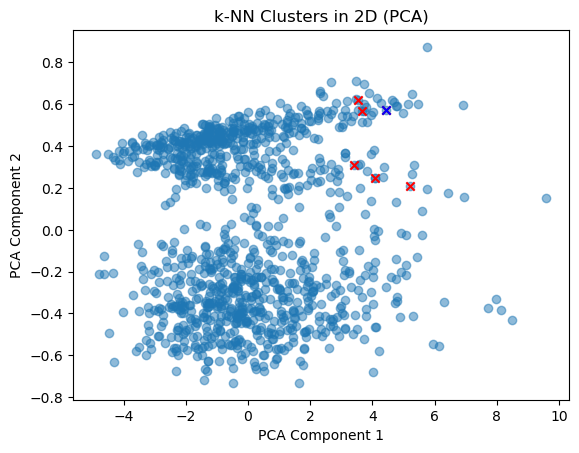

In [80]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
book_pivot_2d = pca.fit_transform(book_pivot_imputed)


book_index = 237  # 'Harry Potter and the Chamber of Secrets (Book 2)'
distances, indices = model.kneighbors(book_pivot_imputed.iloc[book_index].values.reshape(1, -1), n_neighbors=6)


plt.scatter(book_pivot_2d[:, 0], book_pivot_2d[:, 1], alpha=0.5)
plt.scatter(book_pivot_2d[indices[0], 0], book_pivot_2d[indices[0], 1], color='red', marker='x')
plt.scatter(book_pivot_2d[book_index, 0], book_pivot_2d[book_index, 1], color='blue', marker='x')#the book itself is also considered a neighbor
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('k-NN Clusters in 2D (PCA)')
plt.show()
